# [BAT512] Advanced Data Mining with AI <br/><br/> 2주차 실습자료

- 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 탐색

- 데이터 로드
    - 보스턴 집값 예측 데이터(Scikit-learn 제공)

In [3]:
from sklearn import datasets
rawdata = datasets.load_boston()

- 데이터셋 통합

In [4]:
type(rawdata)

sklearn.utils.Bunch

In [5]:
rawdata.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
type(rawdata["data"])

numpy.ndarray

In [7]:
rawdata["data"].shape

(506, 13)

In [8]:
type(rawdata["target"])

numpy.ndarray

In [9]:
rawdata["target"].shape

(506,)

In [10]:
data_target = np.concatenate([rawdata["data"], rawdata["target"].reshape(-1,1)], axis=1)

In [11]:
data_target.shape

(506, 14)

In [12]:
independent_variables = rawdata["feature_names"].tolist()
dependent_variable = ["Target"]
feature_list = independent_variables+dependent_variable

In [13]:
data = pd.DataFrame(data_target, columns=feature_list)

- 데이터 형태 확인

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
data.shape

(506, 14)

In [15]:
print(rawdata["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- 데이터 범위 및 기술 통계량 확인

In [16]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- 결측치 확인

In [17]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

- 상관관계 분석

In [18]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


히트맵

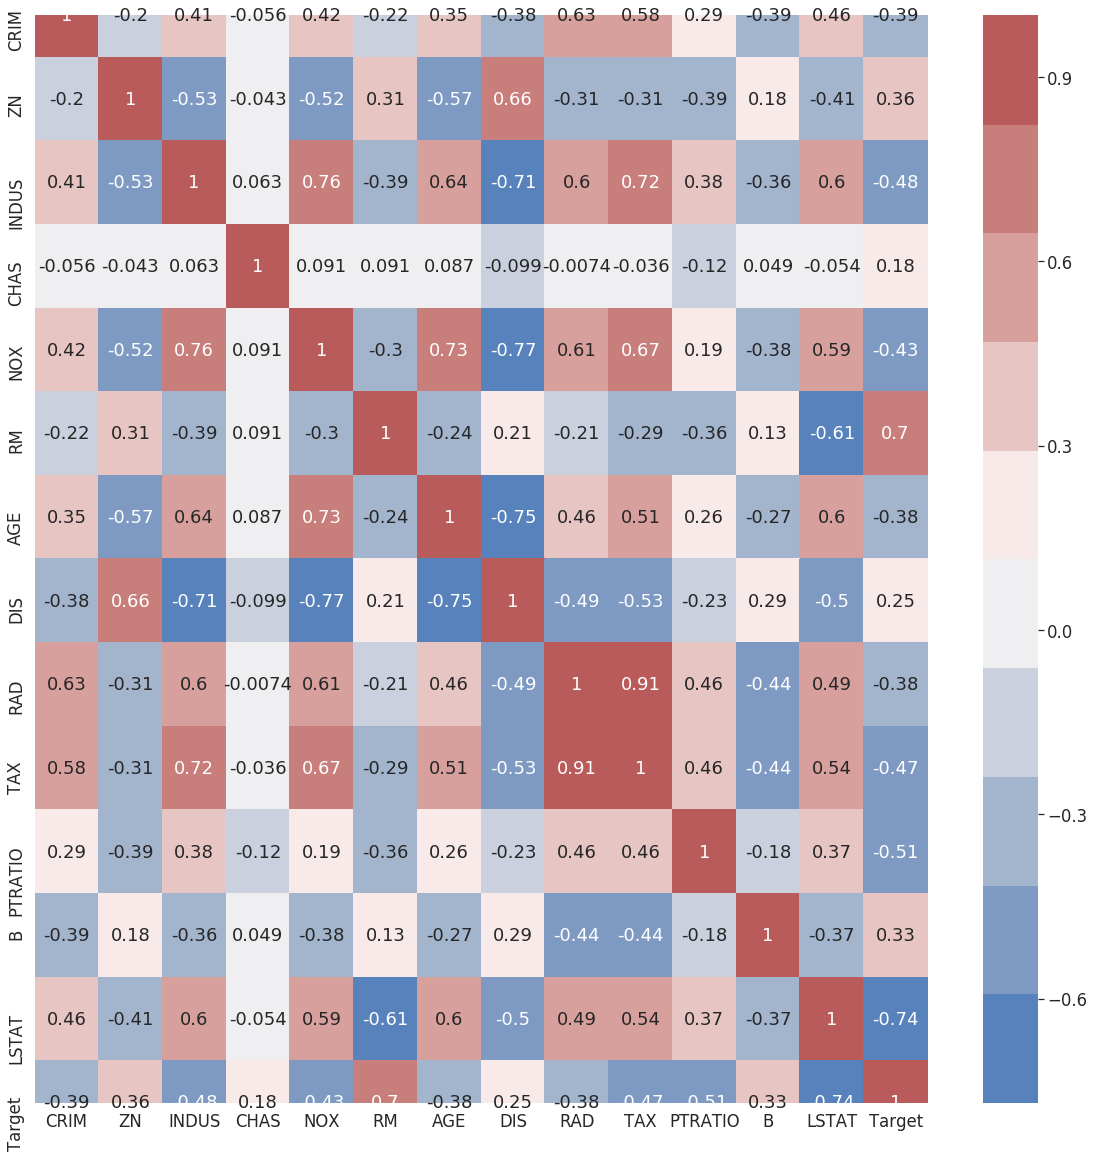

In [19]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(), annot=True, cmap=sns.color_palette("vlag", 10))
plt.show()

산점도

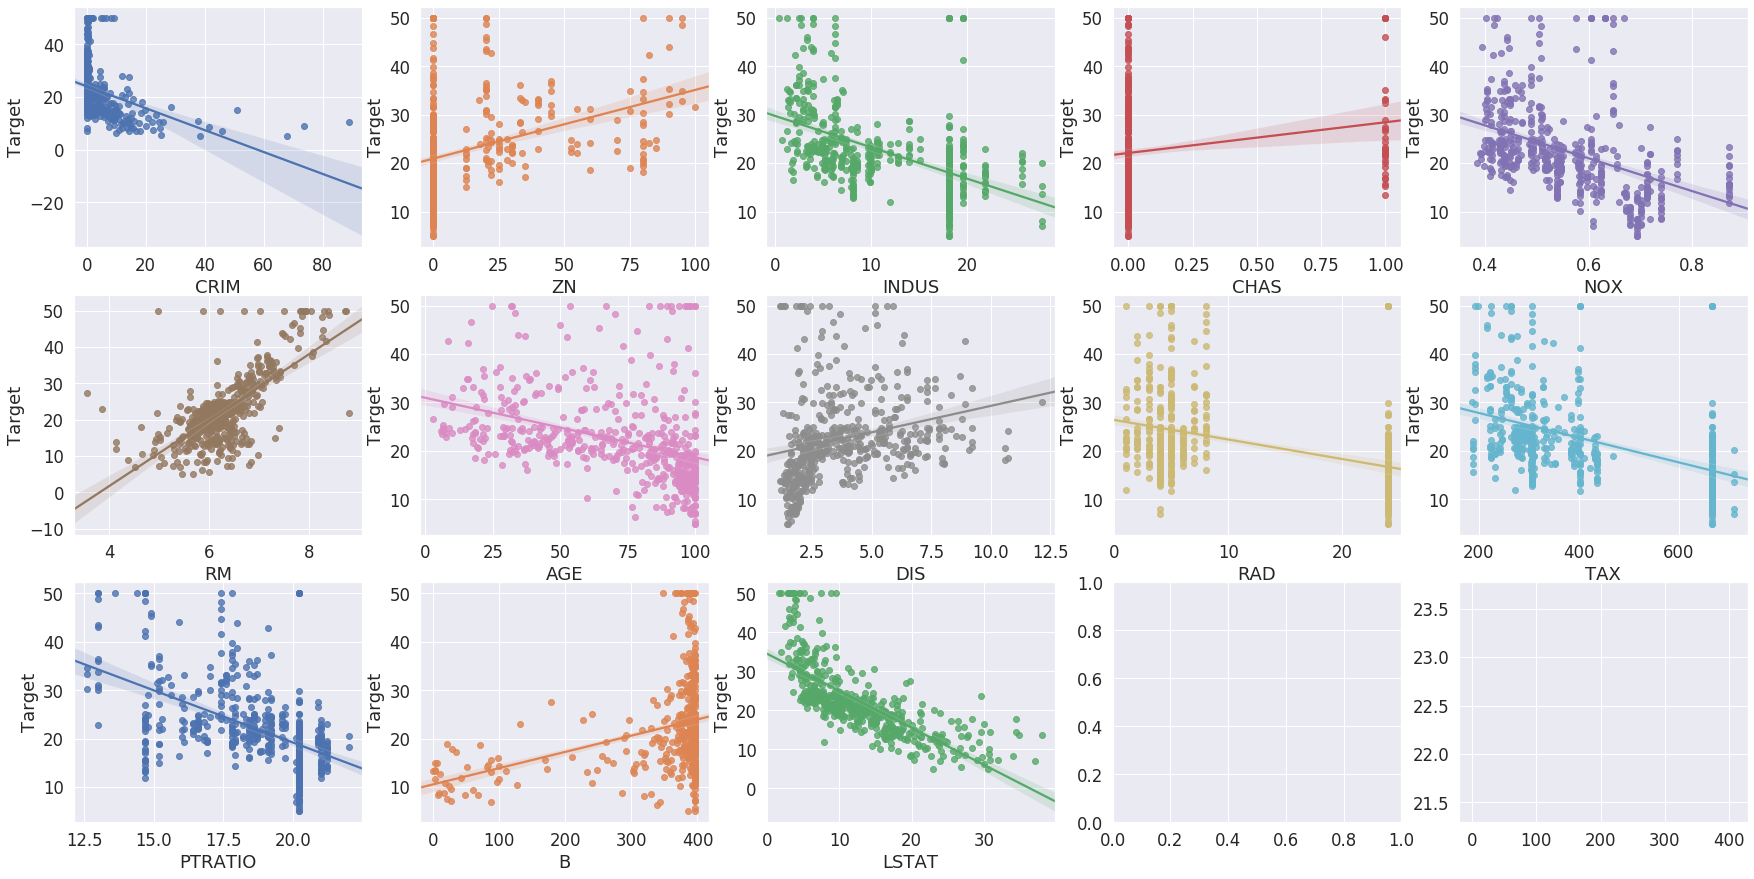

In [20]:
fig, axes = plt.subplots(figsize=(30,15), ncols=5, nrows=3)

for i, feature in enumerate(independent_variables):
    row = int(i/5)
    col = i%5
    sns.regplot(x=feature, y="Target", data=data, ax=axes[row][col])

plt.show()

Target과의 상관관계가 큰 순서로 정렬

In [21]:
data.corr().loc[independent_variables, "Target"].abs().sort_values(ascending=False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

- Target 값 분포 확인

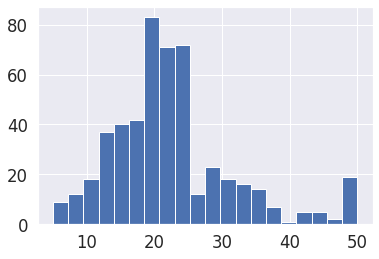

In [22]:
data["Target"].hist(bins=20)
plt.show()

## 데이터 정제

- 변수 변환

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data[independent_variables])

In [24]:
X = pd.DataFrame(X, columns=independent_variables)

In [25]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [26]:
y = data["Target"]

In [27]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

## 선형 회귀 모델 학습

In [28]:
from sklearn.linear_model import LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- 모델 선언 및 학습

In [29]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- 회귀 계수 확인

In [30]:
model.coef_

array([-0.92814606,  1.08156863,  0.1409    ,  0.68173972, -2.05671827,
        2.67423017,  0.01946607, -3.10404426,  2.66221764, -2.07678168,
       -2.06060666,  0.84926842, -3.74362713])

In [31]:
model.intercept_

22.532806324110684

In [32]:
print("가중치:", np.round(model.coef_, 2))
print("편향:", np.round(model.intercept_,2))

가중치: [-0.93  1.08  0.14  0.68 -2.06  2.67  0.02 -3.1   2.66 -2.08 -2.06  0.85
 -3.74]
편향: 22.53


In [33]:
coefficients = pd.Series(model.coef_, index=independent_variables)

- 회귀 계수를 통한 종속변수에 대한 독립변수의 영향력 확인

In [34]:
coefficients.sort_values(ascending=False)

RM         2.674230
RAD        2.662218
ZN         1.081569
B          0.849268
CHAS       0.681740
INDUS      0.140900
AGE        0.019466
CRIM      -0.928146
NOX       -2.056718
PTRATIO   -2.060607
TAX       -2.076782
DIS       -3.104044
LSTAT     -3.743627
dtype: float64

- 학습 완료된 회귀 모델을 활용한 예측

In [35]:
y_hat = model.predict(X)

In [36]:
y_hat

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [37]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


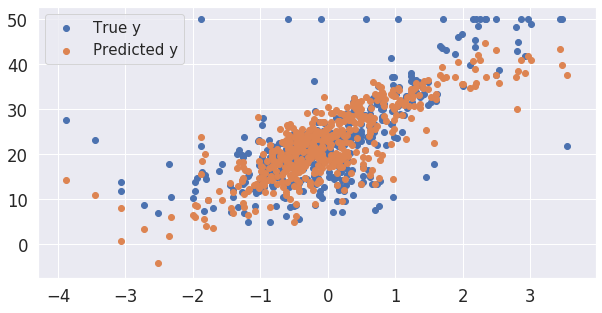

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(X["RM"], y, label="True y")
plt.scatter(X["RM"], y_hat, label="Predicted y")
plt.legend(prop={"size": 15})
plt.show()

- 행렬 연산을 통한 예측

In [39]:
X_matrix = np.concatenate([X.values, np.ones((len(X), 1))], axis=1)

In [40]:
X_matrix

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  1.        ],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937,  1.        ],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.        ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  1.        ],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163,  1.        ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833,  1.        ]])

In [41]:
X_matrix.shape

(506, 14)

In [42]:
beta_vector = np.array(model.coef_.tolist()+[model.intercept_]).reshape(-1,1)

In [43]:
beta_vector

array([[-9.28146064e-01],
       [ 1.08156863e+00],
       [ 1.40899997e-01],
       [ 6.81739725e-01],
       [-2.05671827e+00],
       [ 2.67423017e+00],
       [ 1.94660717e-02],
       [-3.10404426e+00],
       [ 2.66221764e+00],
       [-2.07678168e+00],
       [-2.06060666e+00],
       [ 8.49268418e-01],
       [-3.74362713e+00],
       [ 2.25328063e+01]])

In [44]:
beta_vector.shape

(14, 1)

In [45]:
y_hat_vector = np.matmul(X_matrix, beta_vector)

In [46]:
y_hat_vector

array([[30.00384338],
       [25.02556238],
       [30.56759672],
       [28.60703649],
       [27.94352423],
       [25.25628446],
       [23.00180827],
       [19.53598843],
       [11.52363685],
       [18.92026211],
       [18.99949651],
       [21.58679568],
       [20.90652153],
       [19.55290281],
       [19.28348205],
       [19.29748321],
       [20.52750979],
       [16.91140135],
       [16.17801106],
       [18.40613603],
       [12.52385753],
       [17.67103669],
       [15.83288129],
       [13.80628535],
       [15.67833832],
       [13.38668561],
       [15.46397655],
       [14.70847428],
       [19.54737285],
       [20.8764282 ],
       [11.45511759],
       [18.05923295],
       [ 8.81105736],
       [14.28275814],
       [13.70675891],
       [23.81463526],
       [22.34193708],
       [23.10891142],
       [22.91502612],
       [31.35762569],
       [34.21510225],
       [28.02056414],
       [25.20386628],
       [24.60979273],
       [22.94149176],
       [22

In [47]:
y_hat_vector.shape

(506, 1)

- 최소자승법을 통한 파라미터 추정(optional)

In [48]:
XTX = np.matmul(X_matrix.transpose(), X_matrix)
XTX.shape

(14, 14)

In [49]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv.shape

(14, 14)

In [50]:
XTX_invXT = np.matmul(XTX_inv, X_matrix.transpose())
XTX_invXT.shape

(14, 506)

In [51]:
y_vector = y.values
XTX_invXTy = np.matmul(XTX_invXT, y_vector)
XTX_invXTy.shape

(14,)

In [52]:
# 최소자승법의 해
beta_vector_ols = XTX_invXTy
beta_vector_ols

array([-9.28146064e-01,  1.08156863e+00,  1.40899997e-01,  6.81739725e-01,
       -2.05671827e+00,  2.67423017e+00,  1.94660717e-02, -3.10404426e+00,
        2.66221764e+00, -2.07678168e+00, -2.06060666e+00,  8.49268418e-01,
       -3.74362713e+00,  2.25328063e+01])

In [53]:
# Scikit-learn을 통한 선형 회귀 모델의 파라미터 추정 결과
beta_vector

array([[-9.28146064e-01],
       [ 1.08156863e+00],
       [ 1.40899997e-01],
       [ 6.81739725e-01],
       [-2.05671827e+00],
       [ 2.67423017e+00],
       [ 1.94660717e-02],
       [-3.10404426e+00],
       [ 2.66221764e+00],
       [-2.07678168e+00],
       [-2.06060666e+00],
       [ 8.49268418e-01],
       [-3.74362713e+00],
       [ 2.25328063e+01]])

- 회귀 모델 적합도 검정(Goodness-of-fit)

In [54]:
model.score(X, y)

0.7406426641094095

In [55]:
from sklearn.metrics import r2_score

In [56]:
r2_score(y, y_hat)

0.7406426641094095

## 학습/테스트 데이터셋 분할(optional)

- 학습/테스트 데이터셋 분할

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=10)

In [59]:
print("Train set:",X_train.shape,y_train.shape)
print("Test set:",X_test.shape,y_test.shape)

Train set: (455, 13) (455,)
Test set: (51, 13) (51,)


In [60]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
396,0.262832,-0.487722,1.015999,-0.272599,1.194724,0.171480,0.975252,-1.006947,1.661245,1.530926,0.806576,0.441052,0.941538
230,-0.358025,-0.487722,-0.720322,-0.272599,-0.437921,-0.432575,-0.016888,-0.058728,-0.178120,-0.601276,-0.488039,0.237663,-0.140603
98,-0.410990,-0.487722,-1.203282,-0.272599,-0.947582,2.187372,-1.126378,-0.142536,-0.867883,-0.785394,-0.210622,0.404102,-1.273207
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302
260,-0.357663,0.370669,-1.045700,-0.272599,0.797361,1.308358,0.470292,-0.800019,-0.523001,-0.856665,-2.522434,0.396098,-0.429361


In [61]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,-0.414141,0.928623,-1.306878,-0.272599,-0.714347,0.472083,-0.372493,-0.202052,-0.293081,-1.106115,-0.025677,0.402238,-0.521876
193,-0.417972,2.087452,-1.197446,-0.272599,-1.327669,0.734220,-2.086513,1.152560,-0.982843,-0.850726,-1.320292,0.402348,-1.068554
65,-0.416347,2.945843,-1.133246,-0.272599,-1.353584,0.007644,-1.805585,1.338857,-0.637962,-0.423098,-1.089110,0.441052,-1.119016
349,-0.417144,1.229060,-1.442573,-0.272599,-1.085795,0.932248,-1.211723,2.375447,-0.982843,-0.434976,0.575395,0.363753,-0.948004
151,-0.246386,-0.487722,1.231945,-0.272599,2.732346,-1.254603,1.117494,-1.047449,-0.523001,-0.031105,-1.736418,-0.165277,0.087880


- 학습용 데이터셋에 대해 선형 회귀 모델 학습

In [62]:
model_new = LinearRegression()
model_new.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
print("가중치:", np.round(model_new.coef_, 2))
print("편향:", np.round(model_new.intercept_,2))

가중치: [-0.97  1.29 -0.02  0.83 -1.83  2.51 -0.07 -3.17  2.5  -1.9  -1.81  0.98
 -3.82]
편향: 22.48


In [64]:
y_hat_train = model_new.predict(X_train)

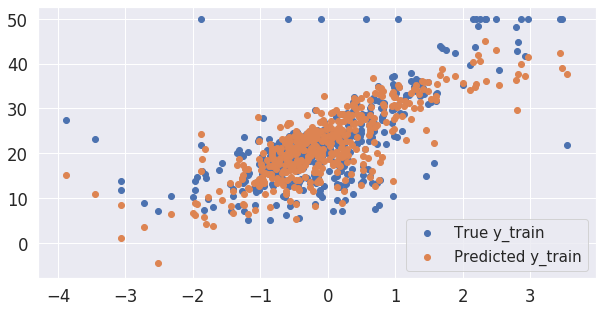

In [65]:
plt.figure(figsize=(10,5))
plt.scatter(X_train["RM"], y_train, label="True y_train")
plt.scatter(X_train["RM"], y_hat_train, label="Predicted y_train")
plt.legend(prop={"size": 15})
plt.show()

In [66]:
model_new.score(X_train, y_train)

0.736878955927907

- 테스트용 데이터셋으로 검증

In [67]:
y_hat_test = model_new.predict(X_test)

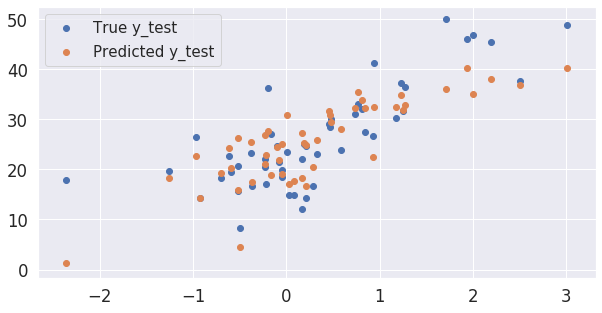

In [68]:
plt.figure(figsize=(10,5))
plt.scatter(X_test["RM"], y_test, label="True y_test")
plt.scatter(X_test["RM"], y_hat_test, label="Predicted y_test")
plt.legend(prop={"size": 15})
plt.show()

In [69]:
model_new.score(X_test, y_test)

0.7176185730018775